Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [49]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/Bank_Personal_Loan_Modelling 2.csv')

# Rename columns for convenience
data.columns = ["ID", "Age", "Experience", "Income", "ZIPCode", "Family", "CCAvg",
                "Education", "Mortgage", "Personal_Loan", "SecuritiesAccount", "CDAccount",
                "Online", "CreditCard"]


In [50]:
# Initial Exploration
print(data.info())  # To check the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   Personal_Loan      5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [51]:
print(data.describe())  # Summary statistics

                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [52]:
print(data.isnull().sum())  # Check for missing values


ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
Personal_Loan        0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64


In [53]:
# Dropping unnecessary columns
data.drop(['ID', 'ZIPCode'], axis=1, inplace=True)


In [54]:
# Handling Negative Values in Experience (Assuming negative values are incorrect)
data['Experience'] = data['Experience'].apply(lambda x: np.nan if x < 0 else x)
data['Experience'].fillna(data['Experience'].median(), inplace=True)

<ipython-input-54-f4bf03b2bc32>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Experience'].fillna(data['Experience'].median(), inplace=True)


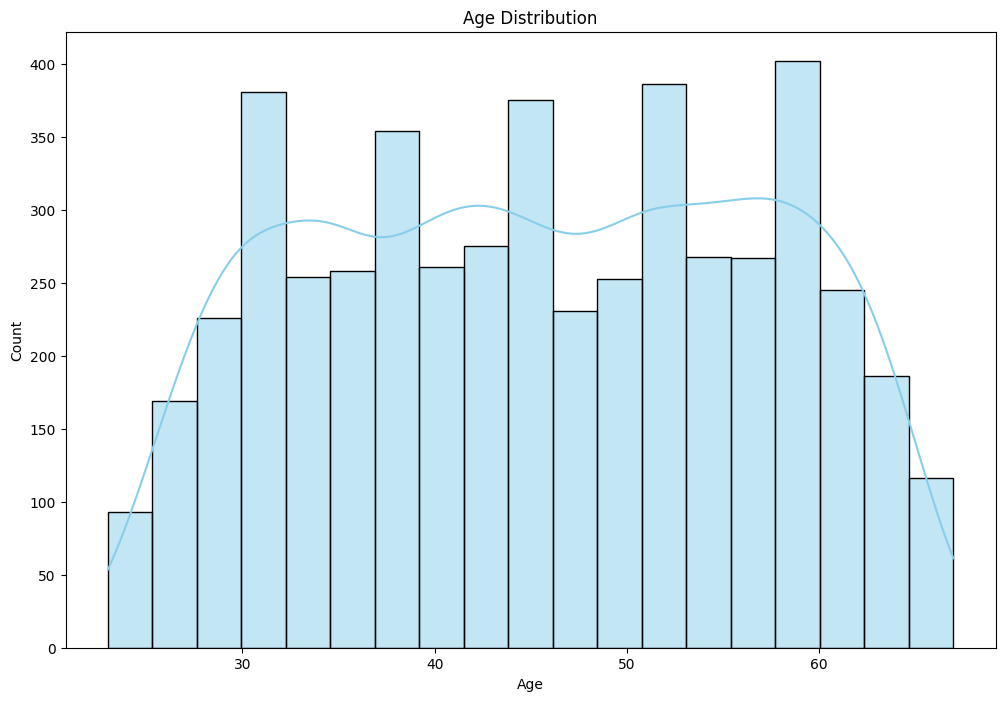

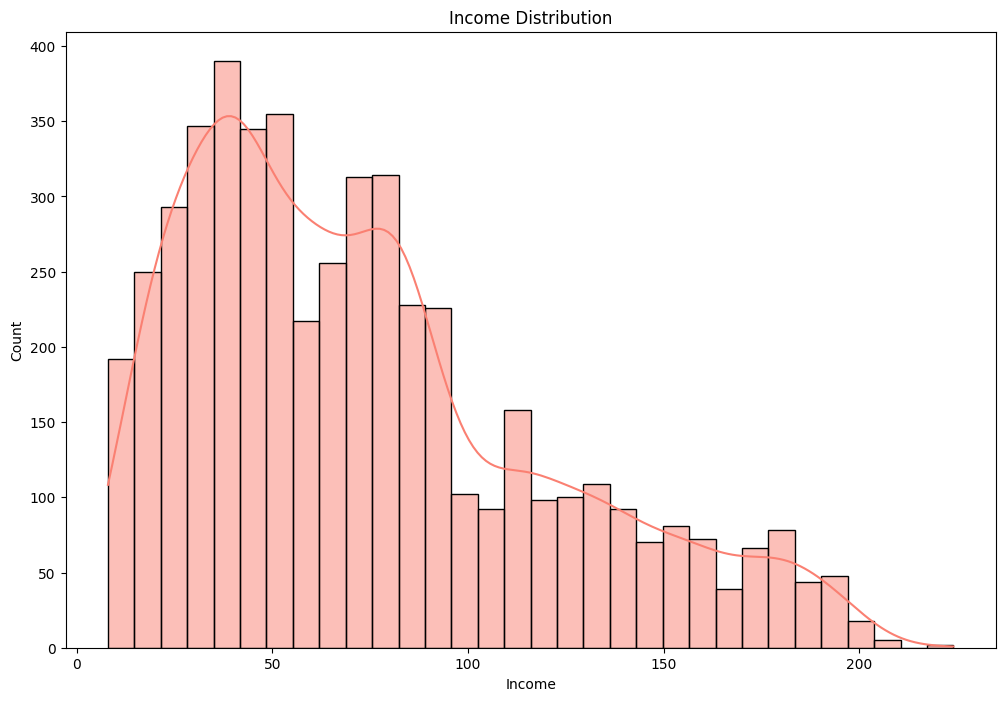

In [55]:
# Visualizing Distributions of Numerical Features
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Income'], kde=True, color='salmon')
plt.title('Income Distribution')
plt.show()

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.


4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

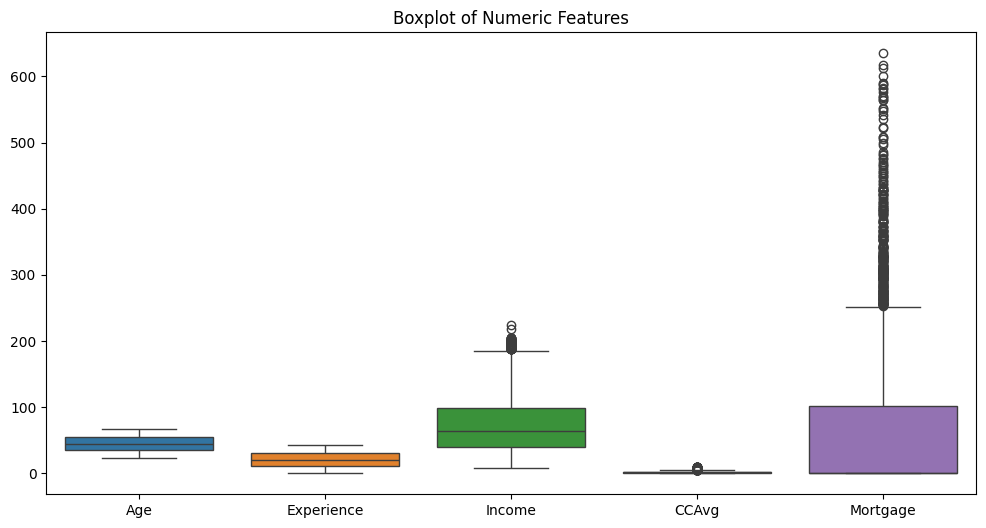

In [56]:
# Checking Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
plt.title('Boxplot of Numeric Features')
plt.show()

In [57]:
# Encoding Categorical Variables
data['Education'] = data['Education'].astype(str)  # Convert Education to string if it is categorical
data = pd.get_dummies(data, columns=['Education'], drop_first=True)


In [58]:
# Encoding categorical columns if any (in this case, none required)
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

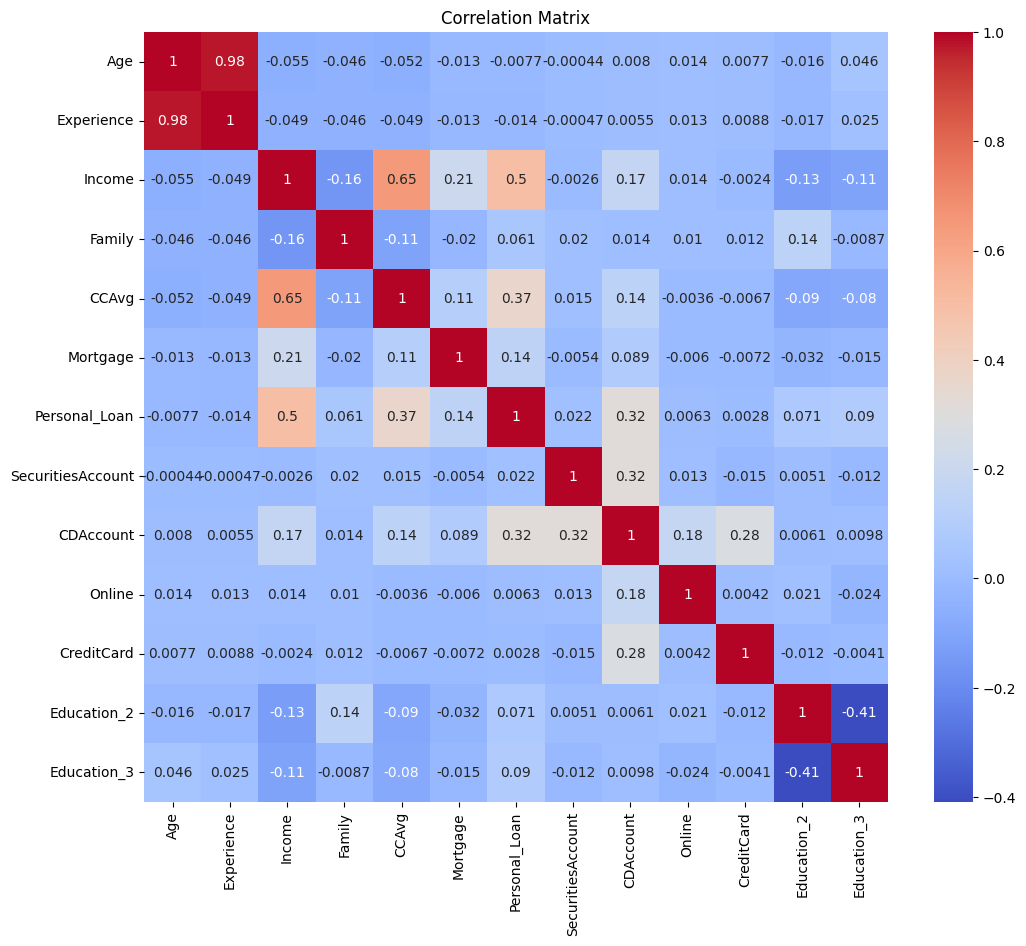

In [59]:
# Updated EDA: Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

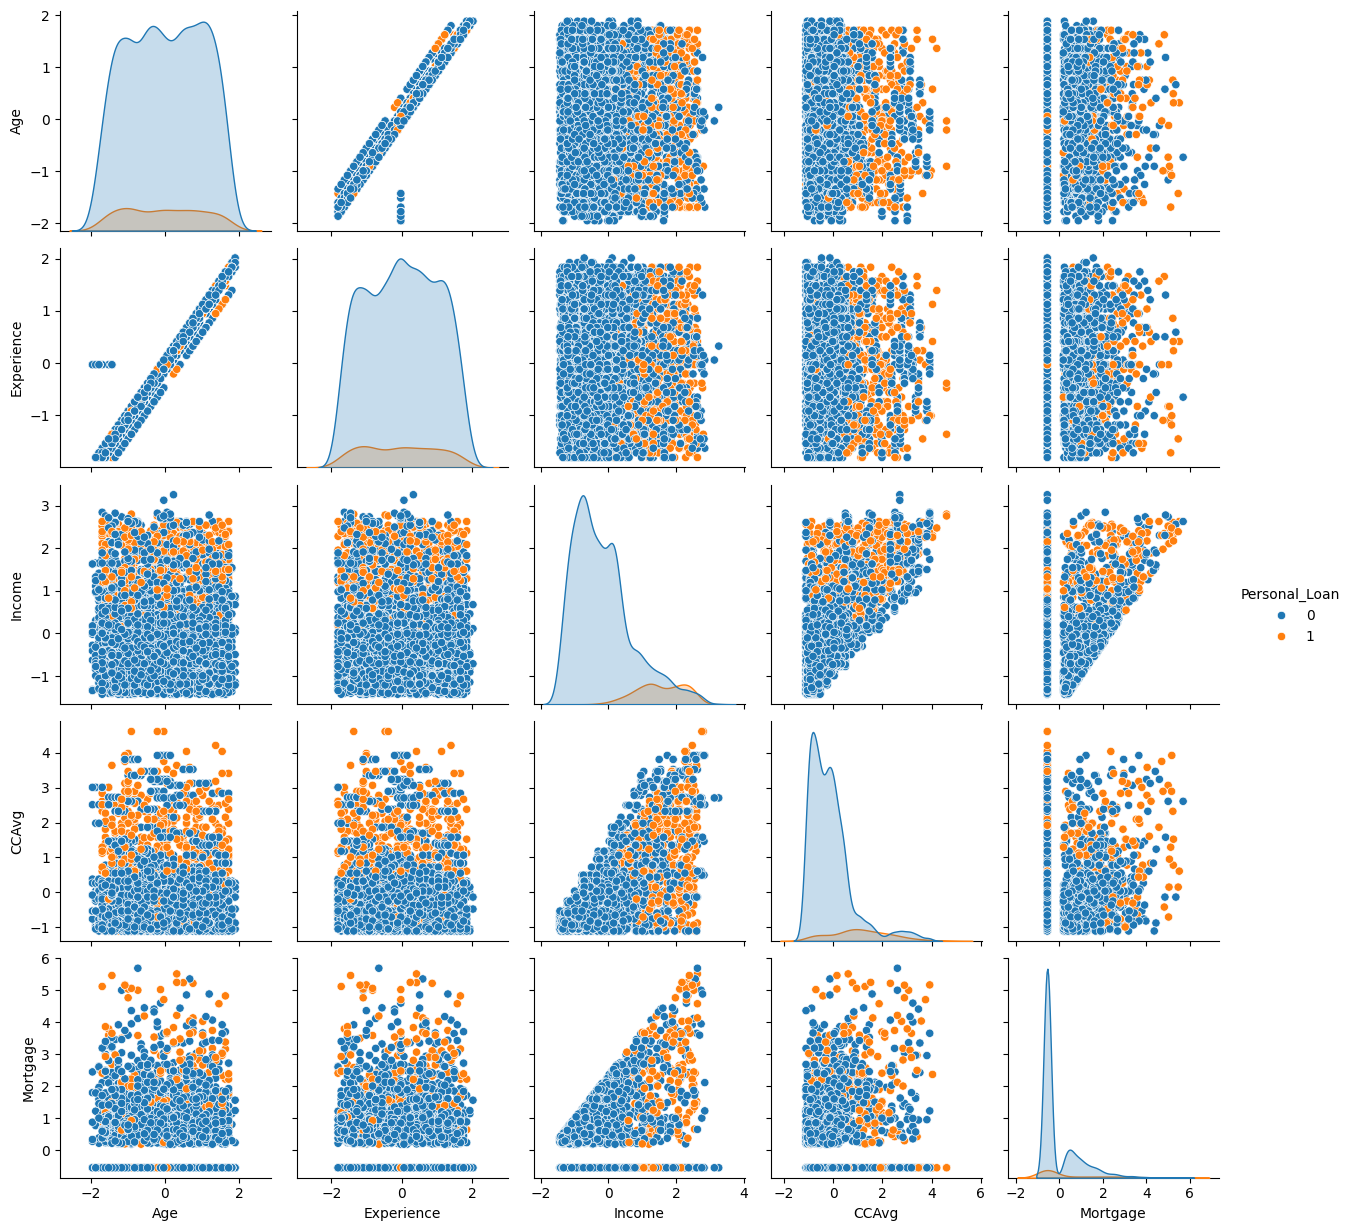

In [60]:
# Further Distribution Analysis with Pair Plot for High Impact Variables
sns.pairplot(data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan']], hue='Personal_Loan')
plt.show()

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.

3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.

4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.

5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.

6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.



In [61]:
# # Splitting data
# X = data.drop('Personal_Loan', axis=1)
# y = data['Personal_Loan']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100, random_state=42)


In [62]:
# Train Logistic Regression
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Train Random Forest
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Define a function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred), "\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred1, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred2, "Random Forest")


Evaluation for Logistic Regression
Accuracy: 0.9562289562289562
Precision: 0.8333333333333334
Recall: 0.6201550387596899
F1-Score: 0.7111111111111111
Confusion Matrix:
 [[1340   16]
 [  49   80]] 

Evaluation for Random Forest
Accuracy: 0.9851851851851852
Precision: 0.9734513274336283
Recall: 0.8527131782945736
F1-Score: 0.9090909090909091
Confusion Matrix:
 [[1353    3]
 [  19  110]] 



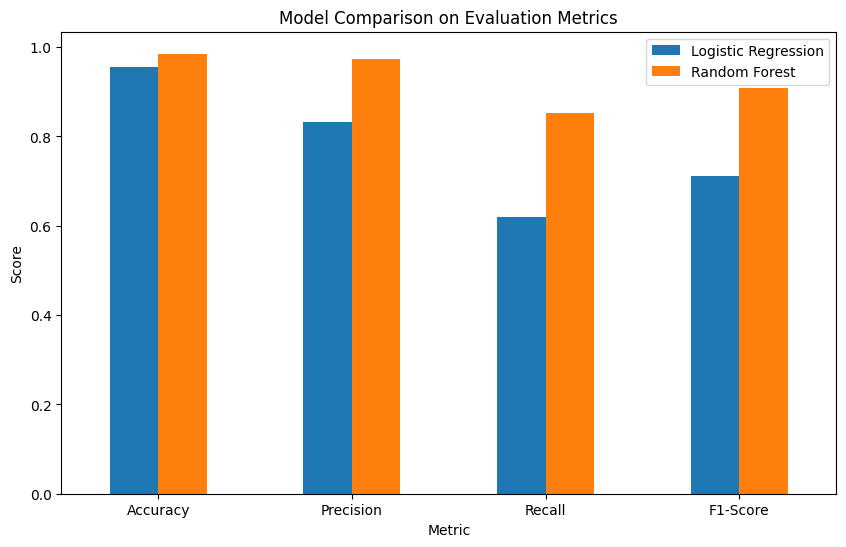

In [63]:
# Comparison plot of Accuracy, Precision, Recall, and F1-Score
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1),
                            recall_score(y_test, y_pred1), f1_score(y_test, y_pred1)],
    'Random Forest': [accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2),
                      recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)]
})
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison on Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


Logistic Regression Model:

Accuracy: 95.6% — the model correctly classified 95.6% of the samples.

Precision: 83.3% — when the model predicts a personal loan approval, it is correct 83.3% of the time.

Recall: 62.0% — the model captured 62% of the actual loan approvals, indicating some false negatives.


F1-Score: 71.1% — this balanced metric indicates that the model's performance could be improved in handling positive samples.

Confusion Matrix: Shows that 1340 customers without loans and 80 with loans were correctly classified, with a few false positives (16) and false negatives (49).

Interpretation: Logistic Regression performs adequately but is limited by a lower recall, meaning it's missing a portion of potential loan approvals. It’s simpler and more interpretable, which might be beneficial when insights into customer characteristics affecting loan approval are needed.


Random Forest Model:

Accuracy: 98.5% — very high overall correctness in classification.

Precision: 97.3% — the model’s predictions for loan approvals are very reliable.

Recall: 85.3% — it captures most of the actual loan approvals, with fewer false negatives than Logistic Regression.

F1-Score: 90.9% — a strong balance between precision and recall.

Confusion Matrix: Excellent performance with only a few misclassifications, showing high reliability in identifying both approved and non-approved cases.

Interpretation: Random Forest provides superior results, particularly with high precision and recall, making it effective for accurately predicting loan approvals and minimizing errors. It’s more complex, making it less interpretable than Logistic Regression, but highly effective in this context.

Conclusion and Recommendation:
Use Random Forest for predictive performance, especially when accuracy and precision are critical for business goals (e.g., minimizing loan approval errors).
Consider Logistic Regression if model interpretability is essential, as it still provides reasonable accuracy and insights into factors driving loan approval.
Further Optimization: Explore cross-validation and hyperparameter tuning for Random Forest to ensure robustness and potentially enhance performance further.